In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pybats.dglm import dlm
from matplotlib.pyplot import figure
from pybats_detection.loader import load_cp6
from pybats_detection.intervention import Intervention

In [2]:
dados=pd.read_csv('data/dados_wania_gravidade.csv').T
names=dados.iloc[[0]]
dados=dados.drop('Unnamed: 0')
dados.columns=names.values.tolist()
dados=dados.astype('float64')
dados=dados.iloc[0:98,:]

In [5]:
outcome=dados[['Mero']]

covid=dados[['Entradas_COVID']].values/dados[['Entradas']].values
inter=(np.arange(0,98)>=53).astype('float64')
#inter[52:]=1-np.exp(-(np.arange(52,98)-52)/2)
gravi=dados[['N_VM']].values/dados[['Pac_dia']].values

X=pd.DataFrame({'COVID':covid.squeeze(),'Intervenção':inter,'Gravidade':gravi.squeeze()})

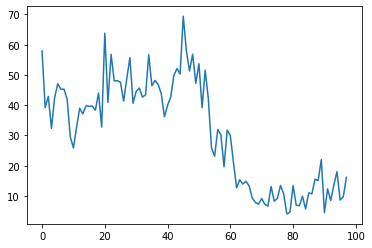

In [6]:
plt.plot(outcome.values)

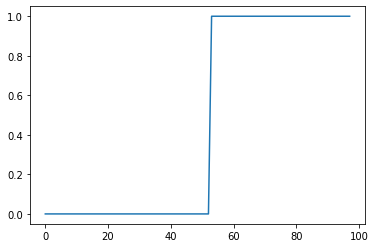

In [7]:
plt.plot(inter)

In [26]:
a = np.array([0, 0, 0, 0])
R = np.eye(4)
mod = dlm(a0=a, R0=R, ntrend=1, deltrend=[1], nregn=3,delregn=[1,1,1])
mod.get_coef()

,Mean,Standard Deviation
Intercept,0,1.0
Regn 1,0,1.0
Regn 2,0,1.0
Regn 3,0,1.0


In [27]:
# Filter and Smooth without intervention
smooth = Intervention(mod=mod)
results = smooth.fit(y=outcome,X=X)
results.keys()

dict_keys(['filter', 'smooth', 'model'])

In [29]:

## dict_keys(['filter', 'smooth', 'model'])
dict_filter = results.get("filter")
dict_smooth = results.get("smooth")
data_posterior = dict_smooth.get("posterior")
data_filter = dict_filter.get("posterior")
data_predi_filter = dict_filter.get("predictive")
data_predi_filter = data_predi_filter.copy()
data_predi_smooth = dict_smooth.get("predictive")
data_predi_smooth = data_predi_smooth.copy()
data_level = data_posterior[data_posterior["parameter"] == "Intercept"].copy()
data_slope = data_posterior[data_posterior["parameter"] == 'Local Slope'].copy()
data_covid = data_posterior[data_posterior["parameter"] == "Regn 1"].copy()
data_inter = data_posterior[data_posterior["parameter"] == "Regn 2"].copy()
data_inter_filter = data_filter[data_filter["parameter"] == "Regn 2"].copy()
data_gravi = data_posterior[data_posterior["parameter"] == "Regn 3"].copy()

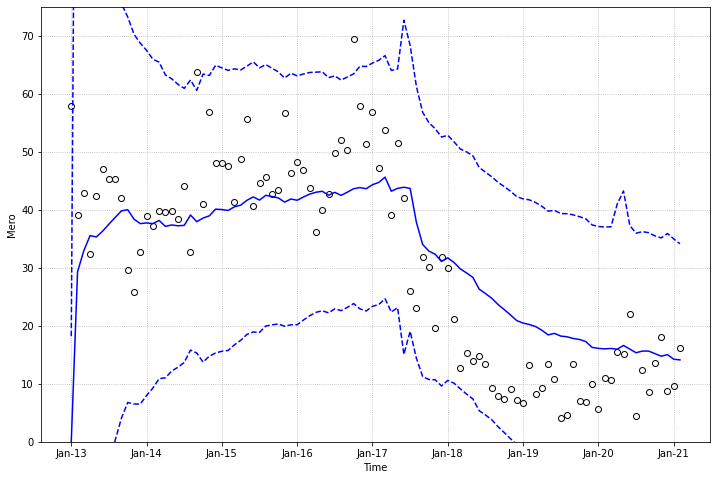

In [30]:
index = dados.index
time = list(index)

data_ref=data_predi_filter

plt.figure(figsize=(12, 8))
plt.plot(time, outcome, "o",
markersize=6, color="black", fillstyle="none")
plt.plot(time, data_ref["f"], color="blue")
plt.plot(time, data_ref["ci_lower"], color="blue",
linestyle="dashed")
plt.plot(time, data_ref["ci_upper"], color="blue",
linestyle="dashed")
plt.grid(linestyle="dotted")
plt.xlabel("Time")
plt.ylabel("Mero")
plt.xticks(np.arange(0,9)*12)
plt.ylim(0,75)
plt.show()

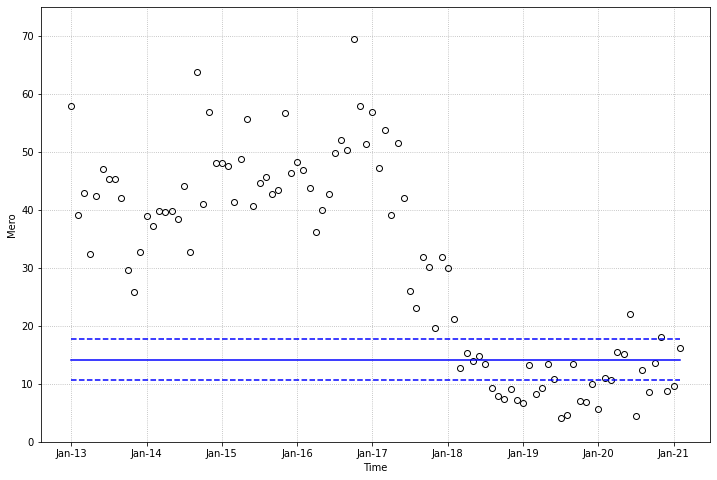

In [41]:
index = dados.index
time = list(index)

data_ref=data_predi_smooth

plt.figure(figsize=(12, 8))
plt.plot(time, outcome, "o",
markersize=6, color="black", fillstyle="none")
plt.plot(time, data_ref["fk"], color="blue")
plt.plot(time, data_ref["ci_lower"], color="blue",
linestyle="dashed")
plt.plot(time, data_ref["ci_upper"], color="blue",
linestyle="dashed")
plt.grid(linestyle="dotted")
plt.xlabel("Time")
plt.ylabel("Mero")
plt.xticks(np.arange(0,9)*12)
plt.ylim(0,75)
plt.show()

In [40]:
np.asarray(data_ref["fk"])

array([14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19048401,
       14.19048401, 14.19048401, 14.19048401, 14.19048401, 14.19

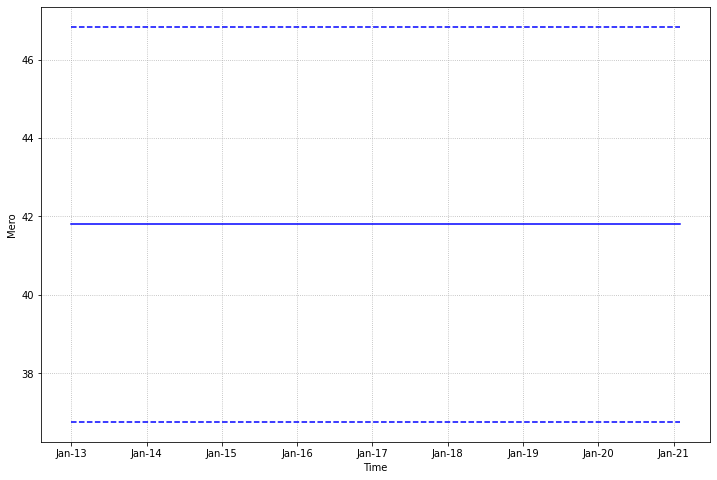

In [32]:
index = dados.index
time = list(index)

data_ref=data_level

plt.figure(figsize=(12,8))
plt.plot(time, data_ref["mean"], color="blue")
plt.plot(time, data_ref["ci_lower"], color="blue",
linestyle="dashed")
plt.plot(time, data_ref["ci_upper"], color="blue",
linestyle="dashed")
plt.grid(linestyle="dotted")
plt.xlabel("Time")
plt.ylabel("Mero")
plt.xticks(np.arange(0,9)*12)
plt.show()

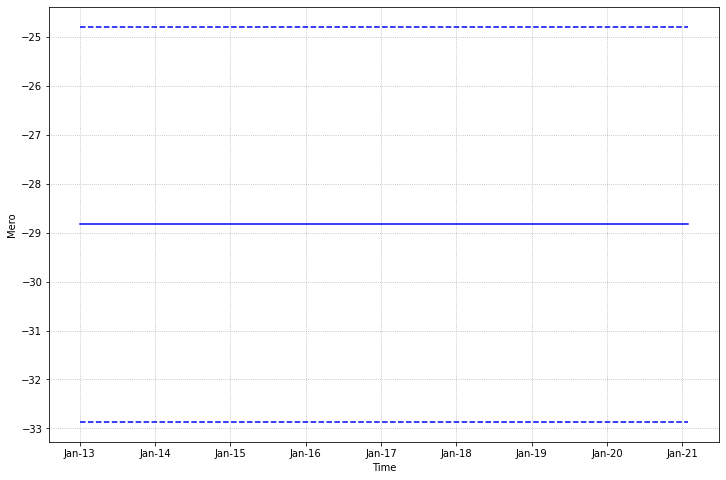

In [33]:
index = dados.index
time = list(index)

data_ref=data_inter

plt.figure(figsize=(12,8))
plt.plot(time, data_ref["mean"], color="blue")
plt.plot(time, data_ref["ci_lower"], color="blue",
linestyle="dashed")
plt.plot(time, data_ref["ci_upper"], color="blue",
linestyle="dashed")
plt.grid(linestyle="dotted")
plt.xlabel("Time")
plt.ylabel("Mero")
plt.xticks(np.arange(0,9)*12)
plt.show()